In [1]:
# Importamos las librerias que necesitamos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Fuente del dataset
"""https://opendata-ajuntament.barcelona.cat/es/"""

# URL del dataset
"""https://raw.githubusercontent.com/OHI-Science/data-science-training/master/data/gapminder.csv"""

# Descripción del dataset 
"""Accidientes registrados en la ciudad de Barcelona durante el año 2017"""

# Importamos dataset
path = r'C:\Users\adria\Desktop\Python\python_curso60h - Barcelona activa\Datasets\accidents_2017.csv'
df = pd.read_csv(path)

In [2]:
## Añado las columnas que necesito al dataset

# Añadimos columna con el año que estamos analizando.
df['Year'] = 2017

# Añadimos columna nº de accidentes
df['n_accidentes'] = 1
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Year,n_accidentes
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2017,1
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2017,1
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017,1
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,2017,1
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017,1


In [14]:
# Creamos un diccionario con mes (clave) - numero de mes (valor).
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

# Convertimos los nombres de los meses en números.
df['Month'].replace(month_to_int,inplace = True)

# Creamos una columna con el formato fecha que combina finlas hora, mes, dia y año.
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df.head(3)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Year,n_accidentes,Date
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,10,13,8,Morning,2,0,2,2,2.125624,41.340045,2017,1,2017-10-13
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,Morning,2,0,2,2,2.120452,41.339426,2017,1,2017-09-01
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,12,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017,1,2017-12-08


In [15]:
# Número de accidentes por meses
accidents_month = df.groupby(df['Date'].dt.month).count()

accidents_month.head(3)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Year,n_accidentes,Date
Date,,,,,,,,,,,,,,,,,,
1,844,844,844,844,844,844,844,844,844,844,844,844,844,844,844,844,844,844
2,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824,824
3,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935


In [16]:
## Datos para el gráfico

# Número de accidentes por meses (eje x)
accidents_month = df.groupby(df['Date'].dt.month).count()['Date']

# Meses (eje y)
y_pos = np.array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
accidents_month

Date
1     844
2     824
3     935
4     845
5     963
6     908
7     918
8     652
9     769
10    928
11    991
12    762
Name: Date, dtype: int64

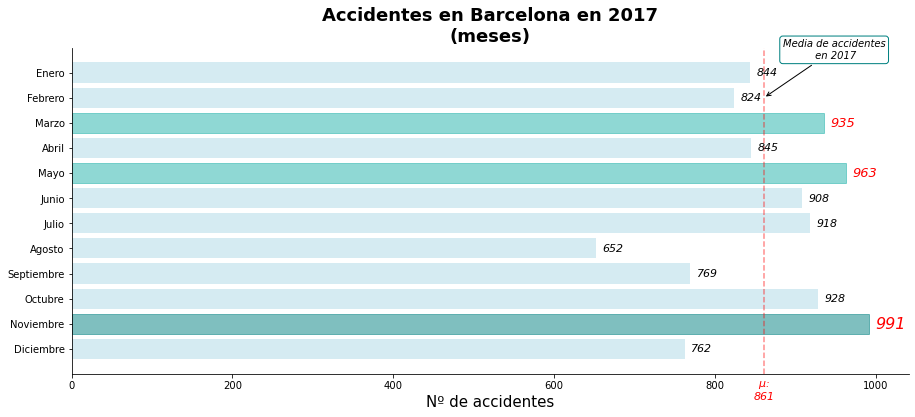

In [17]:
################### GRÁFICO 1 ####################

# Descripción del gráfico:
""" Utilizamos el diagrama de barras horizontales para mostrar el nº de accidentes 
de tráfico ocasionados en Barcelona durante los meses del año 2017"""

## Datos necesarios para el gráfico 1 ##

# Número de accidentes por meses (eje x)
accidents_month = df.groupby(df['Date'].dt.month).count()['Date']

# Meses (eje y)
y_pos = np.array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
accidents_month

## GRÁFICO ##

# Creación figura
fig = plt.figure(figsize=(15,6))

# Creación subplot dentro de la figura.
ax1 = fig.add_subplot(111)

# plot: accidentes por mes
grafico = ax1.barh(y_pos, 
                   accidents_month, 
                   align ='center', 
                   color = 'lightblue',
                   alpha = 0.5)

# Editamos colores de los meses con + nº de accidentes.
grafico[2].set_color('lightseagreen')
grafico[4].set_color('lightseagreen')
grafico[10].set_color('teal')

# Invertimos etiquetas eje y (enero - diciembre)
ax1.invert_yaxis()

# Anotar números por cada mes y pintar valores + importantes.
for y,x in enumerate(accidents_month):
    if  y == 4 or y == 2:
        ax1.annotate(x, 
                     xy=(x+8,y),
                     va = 'center', 
                     fontstyle = 'italic', 
                     fontsize = 13,
                     color = '#ff0000')
        
    elif y == 10: 
        ax1.annotate(x, 
                     xy=(x+8,y),
                     va = 'center', 
                     fontstyle = 'italic', 
                     fontsize = 16 , 
                     color = '#ff0000')
    else:
        ax1.annotate(x, 
                     xy=(x+8,y),
                     va = 'center', 
                     fontstyle = 'italic',
                     fontsize = 11)

        
# Anotación 1     
mean = int(accidents_month.mean())
ax1.annotate(f"Media de accidentes\n en 2017",
             fontstyle = 'italic', 
             xy = (861, 'Febrero'),
             bbox = dict(boxstyle="round",fc="none", ec="teal"),
             xytext = (70, 39), 
             textcoords ='offset points', 
             ha ='center',
             arrowprops=dict(arrowstyle="->"))

# Anotación 2
ax1.annotate(f"$\mu$:\n{mean}",
             fontstyle = 'italic', 
             xy=(861, 12),
             xytext=(0, -26),
             textcoords='offset points', 
             ha='center',
             fontsize = 11,
             color = 'r')

# line de la media
ax1.axvline(mean, color = 'r', alpha = 0.45, linestyle ='--')

# Modificamos spines (arriba y derecha)
ax1.spines['top'].set_alpha(0.0)
ax1.spines['right'].set_alpha(0.0)

# Títulos
ax1.set_title('Accidentes en Barcelona en 2017\n(meses)', fontsize=18, weight= 'bold')
ax1.set_xlabel('Nº de accidentes',fontsize=15)

# Muestro el gráfico
plt.show()


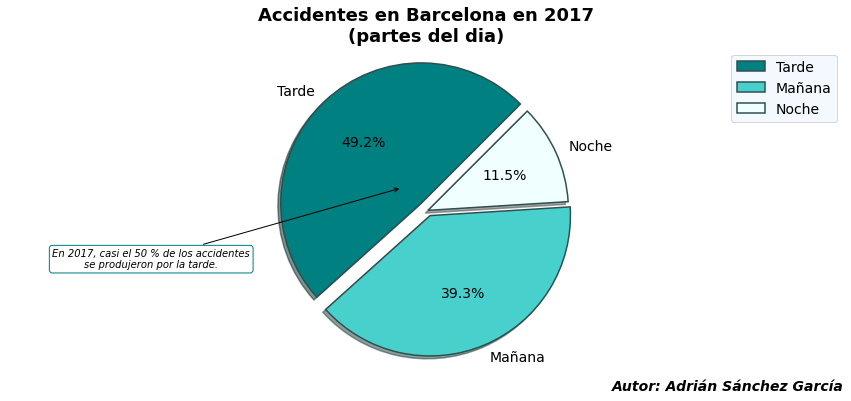

In [58]:
###################### GRÁFICO 2 ######################

# Descripción del gráfico:
""" Utilizamos el circular  para mostrar el nº de accidentes 
de tráfico ocasionados en Barcelona durantes las diferentes partes del dia"""

## Datos necesarios para el gráfico 2 ##

# Datos a graficar: Nº de accidentes en cada parte del dia
grouped_victims_df = df.groupby('Part of the day').sum()['n_accidentes']
grouped_victims_df.name = 'Nº de accidentes'

# Etiquetas
labels = ['Tarde', 'Mañana', 'Noche']

# Colores
colors = ['teal','mediumturquoise','azure']


## GRÁFICO ##
# Creación figura
fig2 = plt.figure(figsize=(15,6))

# Creación subplot dentro de la figura.
ax2 = fig2.add_subplot(111)


# plot: accidentes por mes
grafico2 = ax2.pie(grouped_victims_df, 
                   labels = labels, 
                   textprops = dict(color ="black", fontsize = '14'),
                   explode = [0.07,0.04,0.001], 
                   shadow = True, 
                   autopct = '%1.1f%%',
                   colors = colors, 
                   startangle = 45, 
                   wedgeprops = {'edgecolor':'darkslategrey','linewidth': 1.5}, 
                   pctdistance = 0.6)

# Anotación 1
ax2.annotate(f"En 2017, casi el 50 % de los accidentes\nse produjeron por la tarde.",
             fontstyle = 'italic', 
             xy = (-0.19,0.16),
             bbox=dict(boxstyle="round",fc="none", ec="teal"),
             xytext=(-250, -80), 
             textcoords='offset points', 
             ha='center',
             arrowprops=dict(arrowstyle="->"))

# Anotación 2
ax2.annotate(f"Autor: Adrián Sánchez García",
             fontstyle = 'italic', 
             xy=(-1,-1),
             xytext=(440, -40), 
             textcoords='offset points', 
             ha='center',
             fontsize=14,
             weight= 'bold'
             )


# Título
plt.title('Accidentes en Barcelona en 2017\n(partes del dia)', 
          fontsize=18, 
          weight='bold')


# Leyenda
plt.legend(loc = 'best', 
           fontsize = 14, 
           facecolor = 'aliceblue') 
ax2.axis('equal')

# Mostramos el gráfico
plt.show()